In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")
df = pd.DataFrame()
df["reviews"] = reviews
df.head()


!pip install nltk
import nltk
nltk.download('vader_lexicon')

df.to_csv("BA_reviews.csv")

from google.colab import drive
drive.mount('/content/drive')

df.to_csv("/content/drive/MyDrive/BA_reviews.csv")


#import os
#print(os.getcwd())
#print(os.listdir())
#os.mkdir("data")
#print(os.getcwd())
#df.to_csv("C:/Users/Haniish/data/BA_reviews.csv")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Mounted at /content/drive


# New section

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


review_data = pd.read_csv("/content/drive/MyDrive/BA_reviews.csv")
#review_data = pd.read_csv("https://drive.google.com/drive/my-drive/BA_reviews.csv")



review_data.head(20)
review_data.describe()

col_list = review_data.columns.tolist()
print(col_list)

review_data.columns = ( 'rev_verify' , 'rev_data' )


Mounted at /content/drive
['Unnamed: 0', 'reviews']


In [ ]:
df = pd.DataFrame(review_data)
df
# Specify the set of words to be stripped off
words_to_strip = {'✅ Trip Verified |', 'Not Verified |'}

# Create a new column by stripping off the words from the original column
df['verification'] = df['rev_data'].str.replace('|'.join(words_to_strip), '').str.strip()

col_list = df.columns.tolist()
print(col_list)
print(df)

<ipython-input-2-e7985d96b542>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['verification'] = df['rev_data'].str.replace('|'.join(words_to_strip), '').str.strip()


['rev_verify', 'rev_data', 'verification']
     rev_verify                                           rev_data  \
0             0  Not Verified |  Most uncomfortable flight I ha...   
1             1  ✅ Trip Verified |  I booked our first out of c...   
2             2  ✅ Trip Verified | My husband and I booked seat...   
3             3  Not Verified |  May 3, flew from Seattle to He...   
4             4  ✅ Trip Verified | I went through three flights...   
..          ...                                                ...   
995         995  ✅ Trip Verified | Flew London Gatwick to Tiran...   
996         996  ✅ Trip Verified |  London Heathrow to Murcia a...   
997         997  ✅ Trip Verified |  London to Amsterdam. BA's s...   
998         998  ✅ Trip Verified |  Aberdeen to Abu Dhabi via L...   
999         999  ✅ Trip Verified |  Prague to Denver via London...   

                                          verification  
0    |  Most uncomfortable flight I have ever exper...  
1 

In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the text column from the DataFrame
text_column = df.iloc[:, 2]

# Tokenize and remove stopwords for each document
stopword_list = set(stopwords.words('english'))

# List to store the processed documents
documents = []



for text in text_column:
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in string.punctuation]

    filtered_tokens1 = [word for word in filtered_tokens if word.lower() not in stopword_list]



  # Add the filtered tokens to the documents list
    documents.append(filtered_tokens1)

# Print the list of documents for demonstration

counter = 1
for doc in documents:
    counter = counter + 1
    print(doc)
print("completed all text")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['uncomfortable', 'flight', 'ever', 'experienced', "'s", 'long', 'time', 'since', 'flown', 'long-haul', 'cramped', 'conditions', 'awful', 'rows', 'close', 'together', 'person', 'front', 'reclined', 'seat', 'TV', 'close', 'could', "n't", 'focus', 'BA', 'seem', 'want', 'make', 'economy', 'uncomfortable', 'encourage', 'customers', 'upgrade', 'worked', 'avoid', 'flying', 'BA', 'future', 'onward', 'flight', 'LATAM', '787', 'aircraft', 'room', 'rows', 'far', 'comfortable', 'return', 'flight', 'Santiago', 'lights', 'turned', '8pm', 'feel', 'cabin', 'crew', 'avoid', 'providing', 'service', 'disappear', 'behind', 'curtains']
['booked', 'first', 'country', 'trip', 'take', 'husband', 'surprise', 'trip', 'Monaco', 'gave', 'us', '3', 'hours', 'connecting', 'flight', 'home', 'Heathrow', 'flight', 'left', 'Seattle', 'hour', 'late', 'causing', 'us', 'miss', 'connecting', 'flight', 'rescheduled', 'even', 'landed', 'booked', 'us', 'flight', '7', 'hours', 'later', 'offered', 'food', 'tickets', 'type', 'r

In [ ]:
#!pip install scikit-learn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convert the list of tokenized words into a list of strings representing preprocessed documents
preprocessed_documents = [' '.join(words) for words in documents]
print(preprocessed_documents)
# Create a CountVectorizer object to convert text into a matrix of token counts
vectorizer = CountVectorizer()

# Fit the vectorizer to the preprocessed documents and transform the documents into a document-term matrix
dtm = vectorizer.fit_transform(preprocessed_documents)



# Build the LDA model
num_topics = 10
lda_model = LatentDirichletAllocation(n_components=num_topics)
lda_model.fit(dtm)


feature_names = vectorizer.get_feature_names_out()
print("Feature Names:", feature_names)

for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")



["uncomfortable flight ever experienced 's long time since flown long-haul cramped conditions awful rows close together person front reclined seat TV close could n't focus BA seem want make economy uncomfortable encourage customers upgrade worked avoid flying BA future onward flight LATAM 787 aircraft room rows far comfortable return flight Santiago lights turned 8pm feel cabin crew avoid providing service disappear behind curtains", "booked first country trip take husband surprise trip Monaco gave us 3 hours connecting flight home Heathrow flight left Seattle hour late causing us miss connecting flight rescheduled even landed booked us flight 7 hours later offered food tickets type reimbursement Additionally sat customer service line hour half see could rebook us earlier flight watch continually assist customers walked outside queue earlier flights available arrived Nice France airport closed including rental car desk offered assistance airline room accommodation night found cab cost 

In [ ]:

import gensim
from gensim import corpora

id2word = corpora.Dictionary(documents)

print(id2word)
##Sentiment analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

count_pos = 0
count_neg = 0
count_neu = 0
pos_doc = []
neg_doc = []
neu_doc = []
for tokens in documents:
    review = ' '.join(tokens)  # Join tokens into a single string
    sentiment_scores = sid.polarity_scores(review)
    sentiment = sentiment_scores['compound']

    print("Review:", review)
    print("Sentiment Score:", sentiment)

    if sentiment >= 0.05:
        count_pos = count_pos + 1
        pos_doc.append('['+review + ']')
        print("Sentiment: Positive")
    elif sentiment <= -0.05:
        count_neg = count_neg + 1
        neg_doc.append(review)
        print("Sentiment: Negative")
    else:
        count_neu = count_neu + 1
        neu_doc.append(review)
        print("Sentiment: Neutral")

    print("-----------------------")
counter = 0
for doc in neg_doc:
    counter = counter + 1
    print("negative review", str(counter), doc)
print("counter =" , counter)
print(neg_doc)

Dictionary<9094 unique tokens: ["'s", '787', '8pm', 'BA', 'LATAM']...>
Review: uncomfortable flight ever experienced 's long time since flown long-haul cramped conditions awful rows close together person front reclined seat TV close could n't focus BA seem want make economy uncomfortable encourage customers upgrade worked avoid flying BA future onward flight LATAM 787 aircraft room rows far comfortable return flight Santiago lights turned 8pm feel cabin crew avoid providing service disappear behind curtains
Sentiment Score: -0.6808
Sentiment: Negative
-----------------------
Review: booked first country trip take husband surprise trip Monaco gave us 3 hours connecting flight home Heathrow flight left Seattle hour late causing us miss connecting flight rescheduled even landed booked us flight 7 hours later offered food tickets type reimbursement Additionally sat customer service line hour half see could rebook us earlier flight watch continually assist customers walked outside queue ear

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


 Words fail describe last awful flight baby across aisle crying flight although horrible go without rest long flight LHR/SFO 's understandable baby cry nonstop crew yakking loudly galley even polite notification conversation could heard cabin made flight unbearable rest sleep always difficult anyway westbound food bad turned whatever nasty offering 2nd service happened really nice tea scones 've said suffering BA concept customer service i.e n't anything help passenger involves extra work time swear mean never BA please lounge packed even single traveler hard time finding seat poor BA skids downhill
Sentiment Score: -0.9858
Sentiment: Negative
-----------------------
Review: Absolutely terrible experience app would let check online repeatedly asked COVID documents accept even provided trying fly back USA citizen app caused repeated errors went British Airways Customer Service check told seat already given away another passenger even though plenty time also industrial action Heathrow me

# New section

Word Cloud



In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


## review has all the text joined as a string
# Create a WordCloud object
print(documents)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(documents)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[['uncomfortable', 'flight', 'ever', 'experienced', "'s", 'long', 'time', 'since', 'flown', 'long-haul', 'cramped', 'conditions', 'awful', 'rows', 'close', 'together', 'person', 'front', 'reclined', 'seat', 'TV', 'close', 'could', "n't", 'focus', 'BA', 'seem', 'want', 'make', 'economy', 'uncomfortable', 'encourage', 'customers', 'upgrade', 'worked', 'avoid', 'flying', 'BA', 'future', 'onward', 'flight', 'LATAM', '787', 'aircraft', 'room', 'rows', 'far', 'comfortable', 'return', 'flight', 'Santiago', 'lights', 'turned', '8pm', 'feel', 'cabin', 'crew', 'avoid', 'providing', 'service', 'disappear', 'behind', 'curtains'], ['booked', 'first', 'country', 'trip', 'take', 'husband', 'surprise', 'trip', 'Monaco', 'gave', 'us', '3', 'hours', 'connecting', 'flight', 'home', 'Heathrow', 'flight', 'left', 'Seattle', 'hour', 'late', 'causing', 'us', 'miss', 'connecting', 'flight', 'rescheduled', 'even', 'landed', 'booked', 'us', 'flight', '7', 'hours', 'later', 'offered', 'food', 'tickets', 'type', 

TypeError: ignored

Word cloud with negative comments




["uncomfortable flight ever experienced 's long time since flown long-haul cramped conditions awful rows close together person front reclined seat TV close could n't focus BA seem want make economy uncomfortable encourage customers upgrade worked avoid flying BA future onward flight LATAM 787 aircraft room rows far comfortable return flight Santiago lights turned 8pm feel cabin crew avoid providing service disappear behind curtains", 'husband booked seats within premium economy booking outward journey BA015 12 February return 11 March last almost last served food time run choices one occasion eat available option curry disagrees flights appeared undue focus curry/spicy food disappointing left us poor opinion British Airways', 'May 3 flew Seattle Heathrow Edinburgh BA lost golf bag caused purchase golf shoes club rentals tees balls tee times two courses St. Andrews took months make promised bag returned 24 hours would reimburse occurred expenses contacted BA state would reimburse toilet

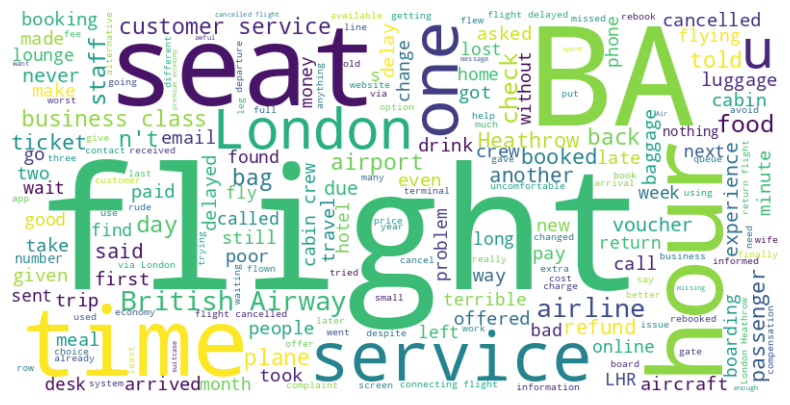

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



print(neg_doc)
type(neg_doc)
neg_doc1 = ' '.join(neg_doc)
type(neg_doc1)



wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_doc1)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word cloud on positive reviews

["[booked first country trip take husband surprise trip Monaco gave us 3 hours connecting flight home Heathrow flight left Seattle hour late causing us miss connecting flight rescheduled even landed booked us flight 7 hours later offered food tickets type reimbursement Additionally sat customer service line hour half see could rebook us earlier flight watch continually assist customers walked outside queue earlier flights available arrived Nice France airport closed including rental car desk offered assistance airline room accommodation night found cab cost us 85 euros one one get hotel thought way something like could happen way home….we wrong flight Nice Heathrow 30 minutes late 2.5 hour layover would think still make flight unfortunately long security lines caused 1.5 hr delay arriving BA closed doors said could hold plane longer despite arriving 15mins departure running Heathrow airport going security sent us back customer service queue first statement ’ get tomorrow begging found 

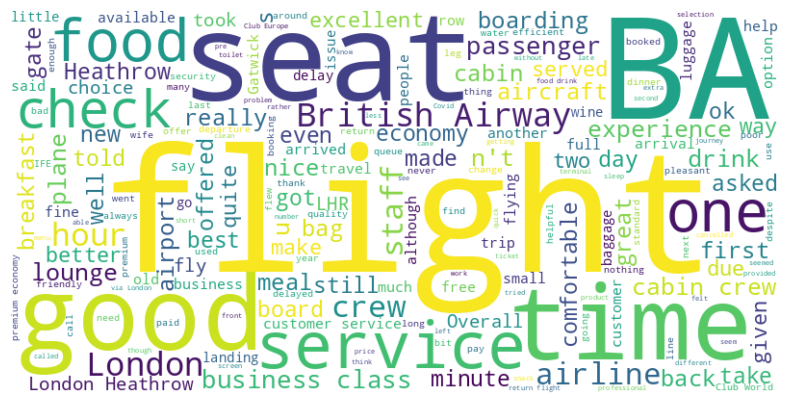

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



print(pos_doc)
type(pos_doc)
pos_doc1 = ' '.join(pos_doc)
type(pos_doc1)



wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_doc1)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()